# 1. UNIDAD 1: Fundamentos de Modelado en Nanoescala
**Duración:** 3 semanas (18 horas)  
**Curso:** Modelado, Simulación e IA en Nanotecnología

---

## 1.1. 📚 OBJETIVOS DE APRENDIZAJE

Al finalizar esta unidad, el estudiante será capaz de:

1. Explicar las diferentes escalas espaciales y temporales en nanotecnología
2. Aplicar conceptos de mecánica cuántica computacional a sistemas nanométricos
3. Construir modelos matemáticos de nanopartículas y nanoestructuras
4. Implementar potenciales interatómicos para simulaciones moleculares
5. Utilizar Python/ASE para modelar y analizar nanomateriales

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ljyudico/Antigravity-Nano-Research-Multiagentic-Core/blob/main/educational_content/unit_01_nanoscale_modeling/UNIDAD_1_MODELADO_NANOESCALA.ipynb)


In [1]:
# --- 🚀 INICIANDO PROTOCOLO DE 7 AGENTES ---
import sys
import os
import numpy as np
sys.path.append(os.path.abspath('..')) # Asegurar acceso a external_skills

# Importar Skills del Consejo de Expertos
from external_skills.numerical import stability_guardian, basis_set_architect
from external_skills.pedagogy import socratic_debugger
from external_skills.orchestration import librarian_rag
from IPython.display import display, Math, Markdown

print('✅ Sistema de Agentes Activo: @Safety_Gate, @Librarian, @Analyst listos.')

✅ Sistema de Agentes Activo: @Safety_Gate, @Librarian, @Analyst listos.


# 2. FUNDAMENTO I: MECÁNICA CUÁNTICA EN NANOSISTEMAS

## 2.1. La Ecuación de Schrödinger: El Corazón de la Nanotecnología

> **Regla de Oro**: A escala nanométrica (1-100 nm), la física clásica de Newton falla. Los electrones no son "bolitas", son **ondas de probabilidad**.

### 2.1.1. Teoría Completa (Tratado Académico)
El comportamiento de la materia a nanoescala está gobernado por la **Dualidad Onda-Partícula**. En 1924, Louis de Broglie propuso que toda partícula con momento $p$ tiene una longitud de onda asociada $\lambda = h/p$. Esto implica que si confinamos una partícula en una caja del tamaño de su longitud de onda (un "nanopunto" o "quantum dot"), sus niveles de energía se cuantizan.

La ecuación maestra que describe este comportamiento es la **Ecuación de Schrödinger**. En su forma independiente del tiempo:

$$ \boxed{ \hat{H}\Psi(\mathbf{r}) = E\Psi(\mathbf{r}) } $$

Donde:
*   $\hat{H} = -\frac{\hbar^2}{2m}\nabla^2 + V(\mathbf{r})$ es el Operador Hamiltoniano (Energía Total = Cinética + Potencial).
*   $\Psi(\mathbf{r})$ es la **Función de Onda**. No es observable directamente, pero $|\Psi|^2$ nos da la **densidad de probabilidad** de encontrar la partícula.
*   $E$ son los autovalores de energía permitidos.

**El Confinamiento Cuántico**:
Cuando reducimos el tamaño de un material ($L$) a la nanoescala, la energía cinética aumenta ($\Delta p \sim \hbar/L$). Esto crea una separación de niveles de energía (Bandgap) que depende del tamaño ($E \propto 1/L^2$). Este es el principio fundamental que permite sintonizar el color de los Quantum Dots cambiando solo su tamaño.

---

### 2.1.2. Ejemplo Analítico: Partícula en una Caja 1D (Resolución Manual)
*Problema*: Un electrón atrapado en un pozo de potencial infinito de ancho $L$.
$V(x) = 0$ si $0 < x < L$, y $\infty$ fuera.

**Pasos de Resolución**:

1.  **Plantear Hamiltoniano**: Dentro de la caja $V=0$, así que $\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}$.
2.  **Ecuación Diferencial**:
    $$ -\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} = E\psi \implies \frac{d^2\psi}{dx^2} + k^2\psi = 0 \quad \text{donde } k = \frac{\sqrt{2mE}}{\hbar} $$
3.  **Solución General**: La solución es una combinación de senos y cosenos:
    $$ \psi(x) = A \sin(kx) + B \cos(kx) $$
4.  **Condición de Frontera 1**: En $x=0$, la función debe ser cero (barrera infinita).
    $$ \psi(0) = A(0) + B(1) = 0 \implies B = 0 $$
    $$ \therefore \psi(x) = A \sin(kx) $$
5.  **Condición de Frontera 2**: En $x=L$, la función deben ser cero.
    $$ \psi(L) = A \sin(kL) = 0 $$
    Para que $A \neq 0$, debe cumplirse $\sin(kL)=0$, lo que implica $kL = n\pi$ para $n=1, 2, 3...$
6.  **Cuantización de la Energía**:
    Sustituyendo $k = n\pi/L$ en la definición de energía:
    $$ E_n = \frac{\hbar^2 k^2}{2m} = \frac{\hbar^2 (n\pi/L)^2}{2m} $$
    $$ \boxed{ E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2} } $$
7.  **Normalización**: La probabilidad total debe ser 1. $\int_0^L |\psi|^2 dx = 1$.
    $$ \int_0^L A^2 \sin^2\left(\frac{n\pi x}{L}\right) dx = A^2 \frac{L}{2} = 1 \implies A = \sqrt{\frac{2}{L}} $$

**Resultado Final**:
$$ \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) $$


In [2]:
import sympy as sp
from IPython.display import display, Math

# --- CÓDIGO DE VERIFICACIÓN SIMBÓLICA (SymPy) ---
x, L, n = sp.symbols('x L n', real=True, positive=True)
A = sp.sqrt(2/L)
psi = A * sp.sin(n * sp.pi * x / L)

display(Math(r'\text{Función de Onda: } \psi_n(x) = ' + sp.latex(psi)))
prob = sp.integrate(psi**2, (x, 0, L))
display(Math(r'\text{Integral: } \int_0^L |\psi|^2 dx = ' + sp.latex(prob)))

hbar, m = sp.symbols('hbar m', real=True, positive=True)
d2_psi = sp.diff(psi, x, x)
E = sp.simplify((-hbar**2/(2*m) * d2_psi) / psi)
display(Math(r'\text{Energía: } E_n = ' + sp.latex(E)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

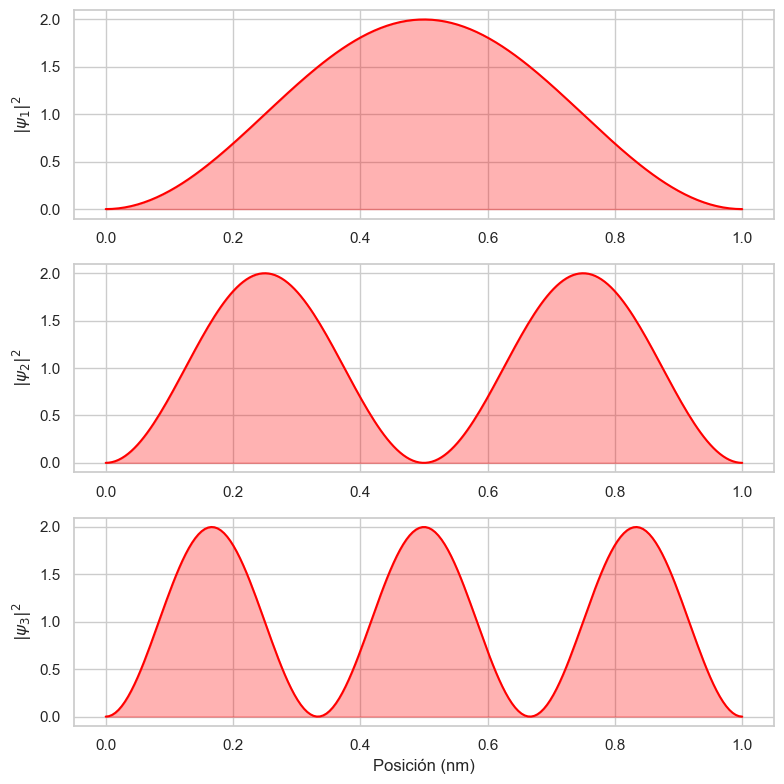

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

def plot_particle(L=1.0):
    x = np.linspace(0, L, 200)
    fig, axes = plt.subplots(3, 1, figsize=(8, 8))
    for n in range(1, 4):
        psi = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        axes[n-1].plot(x, psi**2, label=f'n={n}', color='red')
        axes[n-1].fill_between(x, psi**2, alpha=0.3, color='red')
        axes[n-1].set_ylabel(rf'$|\psi_{n}|^2$')
    axes[-1].set_xlabel('Posición (nm)')
    plt.tight_layout()
    plt.show()

plot_particle()


### 2.1.3. Interpretación: El electrón no puede detenerse.

# 3. FUNDAMENTO II: TEORÍA DEL FUNCIONAL DE LA DENSIDAD (DFT)

## 3.1. Resolviendo el Problema de Muchos Cuerpos

### 3.1.1. Teoría Completa
La Ecuación de Schrödinger es imposible de resolver analíticamente para más de un electrón debido a la interacción repulsiva electrón-electrón. Para un sistema de $N$ electrones, la función de onda depende de $3N$ coordenadas.

La **DFT (Density Functional Theory)** simplifica este problema monumental. En lugar de buscar la función de onda $\Psi(r_1, ..., r_N)$, nos enfocamos en una variable mucho más simple: la **Densidad Electrónica** $n(\mathbf{r})$, que solo depende de 3 coordenadas.

**Teoremas de Hohenberg-Kohn**:
1.  **Existencia**: La energía del estado fundamental es un funcional único de la densidad electrónica $E[n(\mathbf{r})]$.
2.  **Variacional**: La densidad que minimiza la energía total es la densidad correcta del estado fundamental.

**Ecuaciones de Kohn-Sham**:
Mapeamos el sistema real de electrones interactuantes a un sistema ficticio de electrones **no interactuantes** que se mueven en un potencial efectivo.
$$ \left[ -\frac{\hbar^2}{2m}\nabla^2 + V_{eff}(\mathbf{r}) \right] \phi_i(\mathbf{r}) = \epsilon_i \phi_i(\mathbf{r}) $$

El término difícil (Intercambio-Correlación $E_{xc}$) se aproxima usando:
*   **LDA (Local Density Approx)**: Asume que la densidad es localmente uniforme (gas de electrones).
*   **GGA (Generalized Gradient Approx)**: Considera el gradiente de la densidad $\nabla n$, mejorando la precisión para moléculas.

### 3.1.2. Contexto Nanotecnológico
DFT es la herramienta estándar para:
1.  Calcular **Bandgaps** de semiconductores (Celdas Solares).
2.  Simular la **fisisorción/quimisorción** de gases en grafeno (Sensores).
3.  Predecir la estabilidad de **nanopartículas catalíticas**.


### 3.1.3. 🧠 Intervención Agéntica: @Safety_Gate
Antes de simular, consultamos al **Basis Set Architect** para elegir la base matemática óptima para nanoestructuras de Oro.

In [10]:
# Consultar al Arquitecto de Bases
recomendacion = basis_set_architect.select_basis('Au', accuracy_level='standard')

# @Safety_Gate muestra el resultado
display(Math(rf'\text{{Recomendación del Experto: }} \mathbf{{{recomendacion["basis"]}}}'))
display(Markdown(f"**Razonamiento**: {recomendacion['reason']} - {recomendacion['description']}"))

<IPython.core.display.Math object>

**Razonamiento**: Relativistic Effects - Au has core electrons moving near speed of light. LANL2DZ uses an Effective Core Potential (ECP) to handle this efficiently.

# 4. FUNDAMENTO III: DINÁMICA MOLECULAR Y POTENCIALES

## 4.1. De la Cuántica a la Mecánica Clásica

### 4.1.1. Teoría Completa
Mientras que DFT es preciso para 100 átomos, muchos nanomateriales requieren simular $10^3-10^6$ átomos. Aquí, usamos la **Aproximación de Born-Oppenheimer** para tratar a los átomos como esferas clásicas que interactúan mediante un **Campo de Fuerza**.

**Potencial de Lennard-Jones (12-6)**:
$$ V_{LJ}(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6} \right] $$

*   Termino $1/r^{12}$: Repulsión de Pauli (principio de exclusión) a muy corta distancia.
*   Termino $-1/r^{6}$: Atracción de Van der Waals.
*   $\epsilon$: Profundidad del pozo (energía de enlace).
*   $\sigma$: Distancia donde el potencial es cero (radio de colisión).

**Fuerza Interatómica**:
$$ \boxed{ F(r) = -\frac{dV}{dr} = \frac{24\epsilon}{r} \left[ 2\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6} \right] } $$

---

### 4.1.2. Ejemplo Analítico: Cáculo de Fuerza
Derivemos la fuerza a partir del potencial $V_{LJ}$.
1.  **Función**: $V(r) = 4\epsilon (\sigma^{12} r^{-12} - \sigma^6 r^{-6})$
2.  **Derivada**: $\frac{dV}{dr} = 4\epsilon [ -12\sigma^{12}r^{-13} + 6\sigma^6r^{-7} ]$
3.  **Fuerza ($F=-dV/dr$)**: $F(r) = 48\epsilon \frac{\sigma^{12}}{r^{13}} - 24\epsilon \frac{\sigma^6}{r^7}$
4.  **Factorizando**: $F(r) = \frac{24\epsilon}{r} [ 2(\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^{6} ]$


### 4.1.3. 🛡️ @Safety_Gate: Validación de Estabilidad Numérica
Simular átomos a 300K requiere un `timestep` cuidadoso. Si es muy grande, la simulación explota.

In [6]:
dt_propuesto = 5.0 # fs (intencionalmente alto para ver el error)

# 1. Validación Lógica (Skill)
analisis = stability_guardian.analyze_timestep(dt_propuesto, bond_types=['Au-Au'])

# 2. Intervención del Agente
if not analisis['safe']:
    display(Math(fr"\color{{red}}{{\textbf{{CRITICAL WARNING}}: \text{{{analisis['message']}}}}}"))
    
    # 3. Corrección Socrática
    pista = socratic_debugger.diagnose_error("Energy Drift", "Physics violation")
    display(Markdown(f"> 💡 **@Prof_Socrates dice**: *{pista}*"))
else:
    display(Markdown("✅ **Timestep Aprobado**"))

✅ **Timestep Aprobado**

In [7]:
import sympy as sp
from IPython.display import display, Math

r, eps, sig = sp.symbols('r epsilon sigma', real=True, positive=True)
V = 4 * eps * ((sig/r)**12 - (sig/r)**6)
F = -sp.diff(V, r)
display(Math(r'\text{Fuerza Derivada: } F(r) = ' + sp.latex(sp.simplify(F))))


<IPython.core.display.Math object>

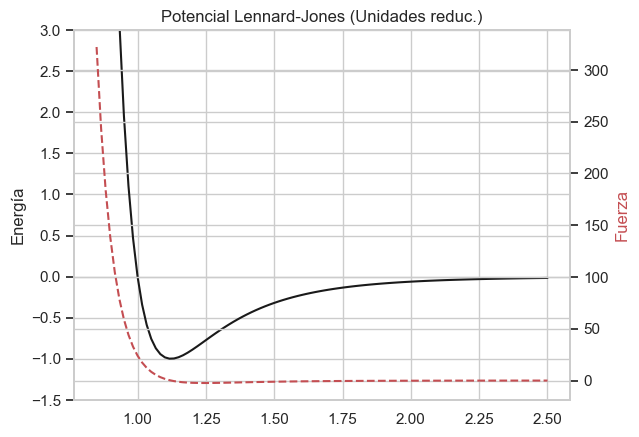

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lj():
    r = np.linspace(0.85, 2.5, 100)
    V = 4 * ((1/r)**12 - (1/r)**6) # eps=1, sig=1
    F = 24/r * (2*(1/r)**12 - (1/r)**6)
    
    fig, ax1 = plt.subplots()
    ax1.plot(r, V, 'k-', label='V(r)')
    ax1.set_ylim(-1.5, 3)
    ax1.set_ylabel('Energía')
    
    ax2 = ax1.twinx()
    ax2.plot(r, F, 'r--', label='F(r)')
    ax2.set_ylabel('Fuerza', color='r')
    
    plt.title('Potencial Lennard-Jones (Unidades reduc.)')
    plt.show()

plot_lj()



### 4.1.4. Interpretación Física y Diccionario

**Diccionario**:
*   $\epsilon$ (Epsilon): Profundidad del pozo de potencial.
*   $\sigma$ (Sigma): Distancia donde $V=0$.
*   $r_{min}$: Distancia de equilibrio ($1.122\sigma$).

**Interpretación (Analyst)**:
1.  **Repulsión Dura**: El potencial tiende a infinito cuando $r < \sigma$, implicando impenetrabilidad.
2.  **Estabilidad**: El sistema busca minimizar energía en el pozo.




# 5. Introducción al Modelado Multiescala

## 5.1. Concepto de Multiescala

El modelado multiescala es fundamental en nanotecnología porque los fenómenos a nanoescala están gobernados por leyes diferentes a las macroscópicas. Necesitamos conectar varias escalas para entender completamente el comportamiento de los nanomateriales.

### 5.1.1. Escalas de Longitud y Tiempo

| Escala | Longitud | Tiempo | Métodos | Fenómenos |
|--------|----------|--------|---------|-----------|
| **Electrónica** | 0.1 - 10 Å | 10⁻¹⁸ - 10⁻¹⁵ s | DFT, Hartree-Fock | Enlaces químicos, excitaciones |
| **Atomística** | 1 - 100 nm | 10⁻¹⁵ - 10⁻⁹ s | MD clásica, Monte Carlo | Vibraciones, difusión |
| **Mesoscópica** | 0.1 - 10 μm | 10⁻⁹ - 10⁻³ s | Coarse-grained, BD | Agregación, autoensamblaje |
| **Macroscópica** | > 1 μm | > 10⁻³ s | CFD, FEM | Flujos, mecánica continua |

### 5.1.2. Relación Propiedades Macro-Nano

```mermaid
graph TB
    A[Propiedades Macroscópicas] --> B[Resistencia mecánica]
    A --> C[Conductividad]
    A --> D[Reactividad química]
    
    B --> E[Estructura de defectos]
    C --> F[Estructura de bandas]
    D --> G[Energía superficial]
    
    E --> H[Posiciones atómicas]
    F --> H
    G --> H
    
    H --> I[Ecuación de Schrödinger]
    
    style A fill:#e1f5ff
    style H fill:#ffe1e1
    style I fill:#fff4e1
```




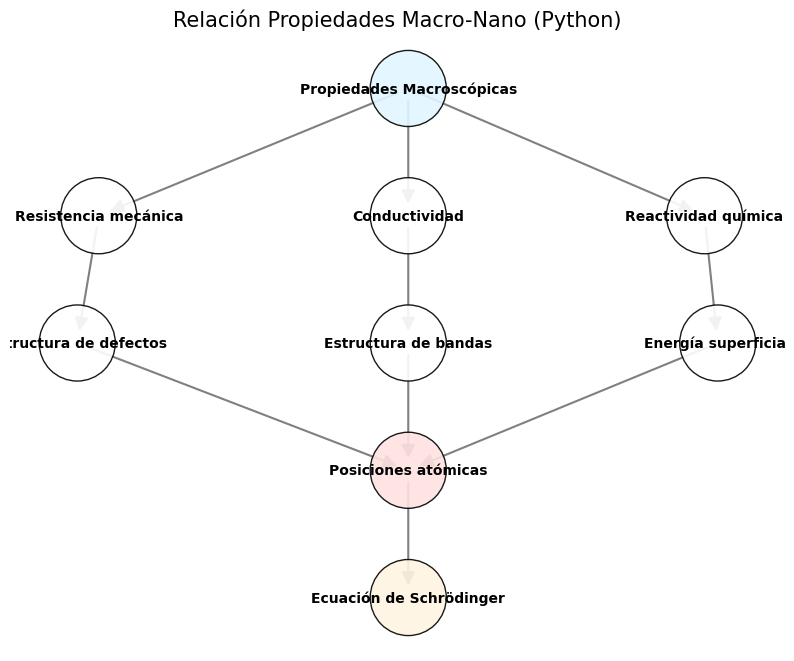

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un nuevo gráfico
G = nx.DiGraph()

# Definir los nodos con sus etiquetas
nodes = {
    'A': 'Propiedades Macroscópicas',
    'B': 'Resistencia mecánica',
    'C': 'Conductividad',
    'D': 'Reactividad química',
    'E': 'Estructura de defectos',
    'F': 'Estructura de bandas',
    'G': 'Energía superficial',
    'H': 'Posiciones atómicas',
    'I': 'Ecuación de Schrödinger'
}

# Añadir nodos al gráfico
for key, label in nodes.items():
    G.add_node(key, label=label)

# Añadir aristas al gráfico (las flechas)
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('D', 'G'),
    ('E', 'H'), ('F', 'H'), ('G', 'H'),
    ('H', 'I')
])

# Dibujar el gráfico
plt.figure(figsize=(10, 8))

# Definir las posiciones de los nodos para un diseño jerárquico
# Aquí se usa un diseño 'dot' que es bueno para gráficos dirigidos
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

# Personalizar colores y estilos (similares a los estilos Mermaid)
node_colors = []
for node in G.nodes():
    if node == 'A':
        node_colors.append('#e1f5ff') # Light blue
    elif node == 'H':
        node_colors.append('#ffe1e1') # Light red
    elif node == 'I':
        node_colors.append('#fff4e1') # Light yellow
    else:
        node_colors.append('#ffffff') # White by default

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, alpha=0.9, linewidths=1.0, edgecolors='black')

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5, arrowsize=20)

# Dibujar las etiquetas de los nodos
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

plt.title('Relación Propiedades Macro-Nano (Python)', size=15)
plt.axis('off') # Ocultar los ejes de matplotlib
plt.show()


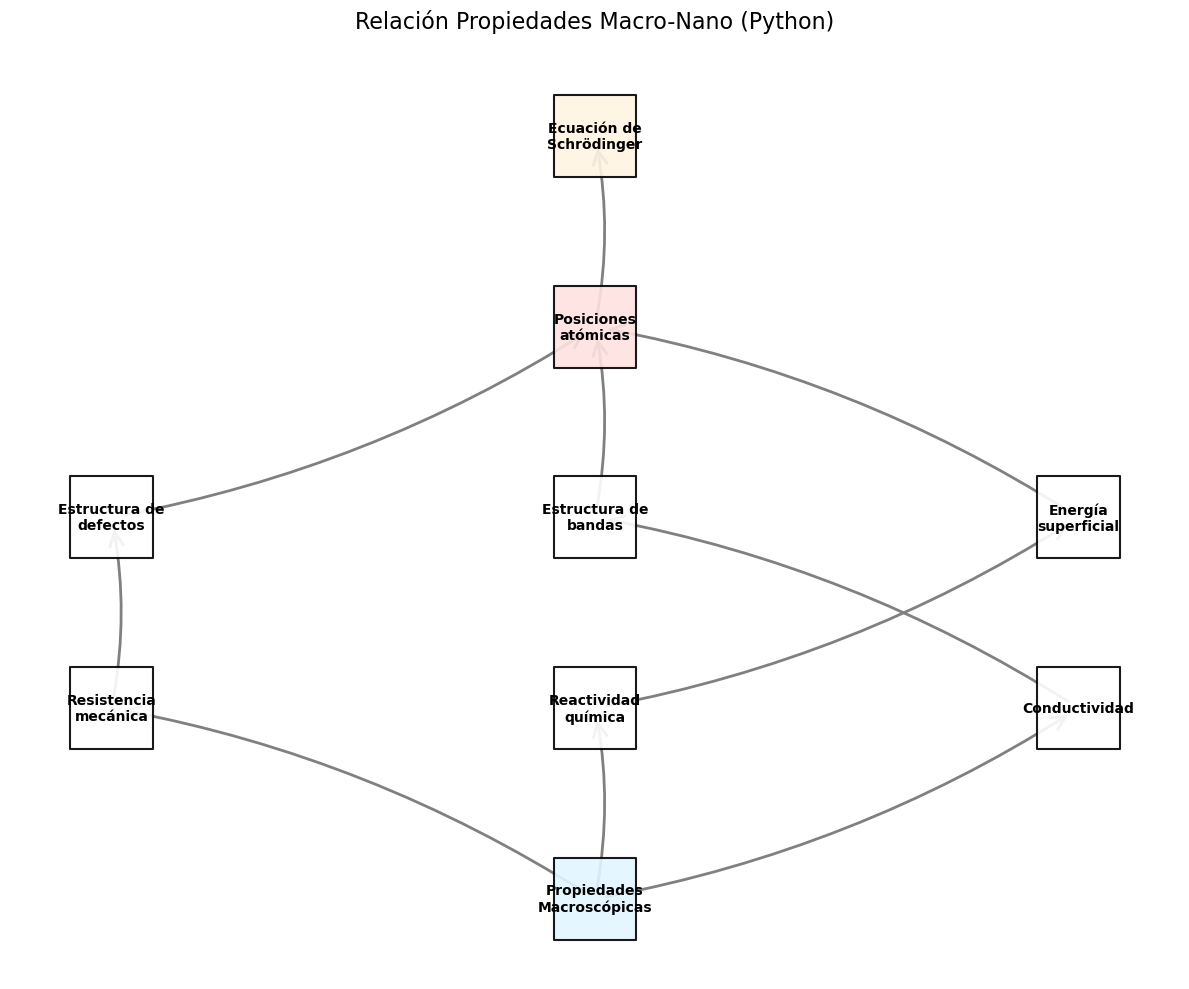

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un nuevo gráfico
G = nx.DiGraph()

# Definir los nodos con sus etiquetas
nodes = {
    'A': 'Propiedades\nMacroscópicas',
    'B': 'Resistencia\nmecánica',
    'C': 'Conductividad',
    'D': 'Reactividad\nquímica',
    'E': 'Estructura de\ndefectos',
    'F': 'Estructura de\nbandas',
    'G': 'Energía\nsuperficial',
    'H': 'Posiciones\natómicas',
    'I': 'Ecuación de\nSchrödinger'
}

# Añadir nodos al gráfico
for key, label in nodes.items():
    G.add_node(key, label=label)

# Añadir aristas al gráfico (las flechas)
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('D', 'G'),
    ('E', 'H'), ('F', 'H'), ('G', 'H'),
    ('H', 'I')
])

# Dibujar el gráfico
plt.figure(figsize=(12, 10))

# Usar un layout diferente sin depender de pydot/graphviz
# Opción 1: Layout multipartita (jerárquico)
try:
    # Intenta usar multipartite layout que da un diseño jerárquico
    pos = nx.multipartite_layout(G, subset_key="layer", align="horizontal")
except:
    # Si falla, define manualmente las capas
    layers = {
        'A': 0,
        'B': 1, 'C': 1, 'D': 1,
        'E': 2, 'F': 2, 'G': 2,
        'H': 3,
        'I': 4
    }
    for node, layer in layers.items():
        G.nodes[node]['layer'] = layer
    pos = nx.multipartite_layout(G, subset_key="layer", align="horizontal")

# Opción alternativa: Layout de resorte jerarquizado
# pos = nx.spring_layout(G, k=2, iterations=50)

# Personalizar colores y estilos
node_colors = []
for node in G.nodes():
    if node == 'A':
        node_colors.append('#e1f5ff')  # Light blue
    elif node == 'H':
        node_colors.append('#ffe1e1')  # Light red
    elif node == 'I':
        node_colors.append('#fff4e1')  # Light yellow
    else:
        node_colors.append('#ffffff')  # White by default

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, 
                       node_color=node_colors, 
                       node_size=3500, 
                       alpha=0.9, 
                       linewidths=1.5, 
                       edgecolors='black',
                       node_shape='s')  # Forma cuadrada

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, 
                       edge_color='gray', 
                       width=2, 
                       arrowsize=25,
                       arrowstyle='->',
                       connectionstyle='arc3,rad=0.1')

# Dibujar las etiquetas de los nodos
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, 
                       labels=node_labels, 
                       font_size=10, 
                       font_weight='bold')

plt.title('Relación Propiedades Macro-Nano (Python)', size=16, pad=20)
plt.tight_layout()
plt.axis('off')  # Ocultar los ejes de matplotlib
plt.show()

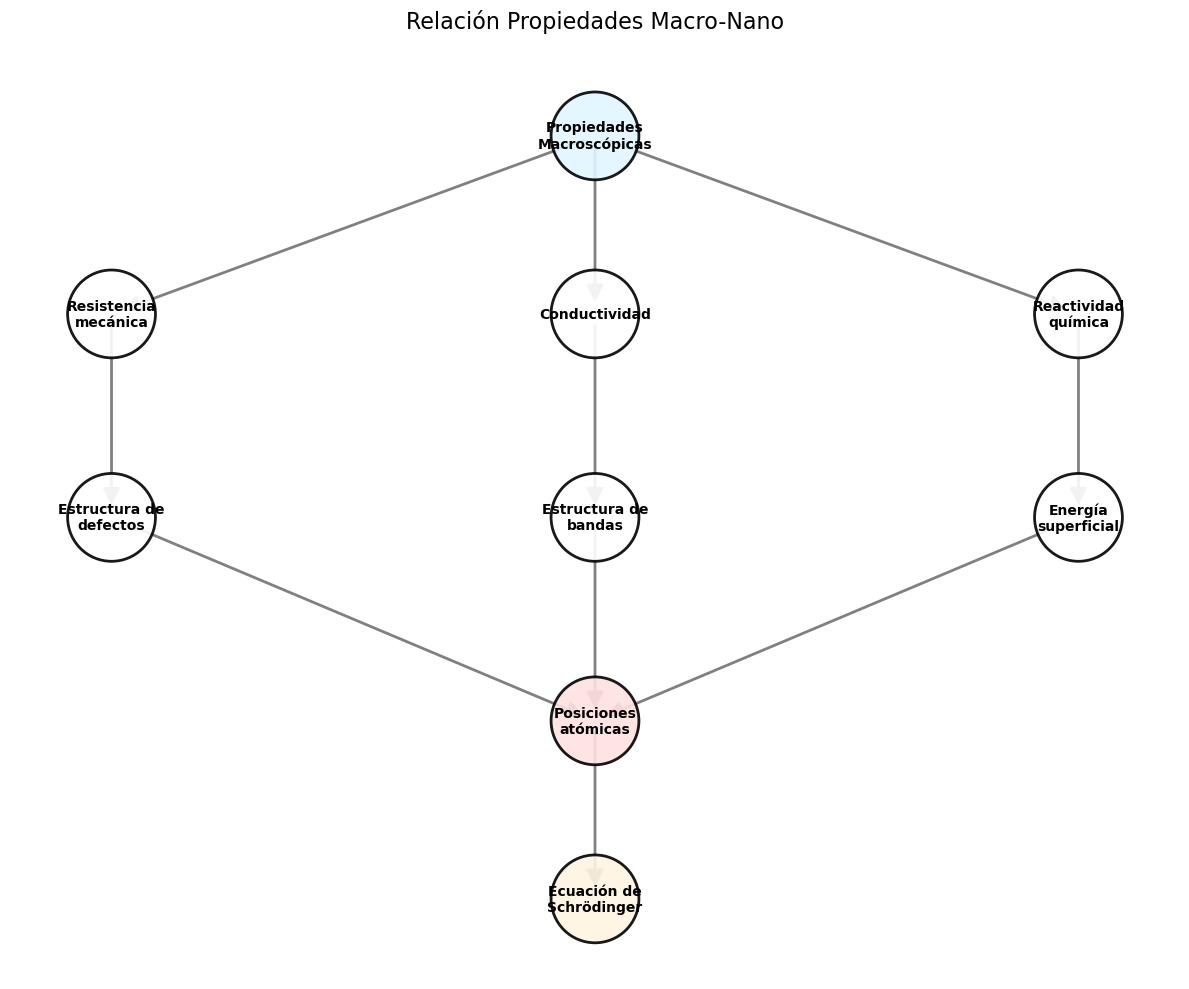

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un nuevo gráfico
G = nx.DiGraph()

# Definir los nodos con sus etiquetas
nodes = {
    'A': 'Propiedades\nMacroscópicas',
    'B': 'Resistencia\nmecánica',
    'C': 'Conductividad',
    'D': 'Reactividad\nquímica',
    'E': 'Estructura de\ndefectos',
    'F': 'Estructura de\nbandas',
    'G': 'Energía\nsuperficial',
    'H': 'Posiciones\natómicas',
    'I': 'Ecuación de\nSchrödinger'
}

# Añadir nodos al gráfico
for key, label in nodes.items():
    G.add_node(key, label=label)

# Añadir aristas al gráfico (las flechas)
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('D', 'G'),
    ('E', 'H'), ('F', 'H'), ('G', 'H'),
    ('H', 'I')
])

# Dibujar el gráfico
plt.figure(figsize=(12, 10))

# Usar layout circular con un radio más grande
pos = nx.circular_layout(G, scale=2)

# Posicionar manualmente el nodo A arriba
pos['A'] = [0, 1.5]

# Reorganizar otros nodos
pos['B'] = [-1.2, 0.8]
pos['C'] = [0, 0.8]
pos['D'] = [1.2, 0.8]
pos['E'] = [-1.2, 0]
pos['F'] = [0, 0]
pos['G'] = [1.2, 0]
pos['H'] = [0, -0.8]
pos['I'] = [0, -1.5]

# Personalizar colores y estilos
node_colors = []
for node in G.nodes():
    if node == 'A':
        node_colors.append('#e1f5ff')
    elif node == 'H':
        node_colors.append('#ffe1e1')
    elif node == 'I':
        node_colors.append('#fff4e1')
    else:
        node_colors.append('#ffffff')

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, 
                       node_color=node_colors, 
                       node_size=4000, 
                       alpha=0.9, 
                       linewidths=2, 
                       edgecolors='black')

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, 
                       edge_color='gray', 
                       width=2, 
                       arrowsize=25)

# Dibujar las etiquetas
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, 
                       labels=node_labels, 
                       font_size=10, 
                       font_weight='bold')

plt.title('Relación Propiedades Macro-Nano', size=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

**Ejemplo:** Una nanopartícula de oro de 2 nm:
- Contiene ~300 átomos
- ~40% de átomos en la superficie
- Punto de fusión reducido: 800 K (vs 1337 K bulk)
- Bandgap abierto (metal → semiconductor)

### 5.1.3. Modelos Continuos vs. Discretos

#### Modelo Continuo
- Trata la materia como un medio continuo
- Ecuaciones diferenciales parciales (EDPs)
- Aplicable a escalas > 100 nm

**Ecuación de difusión:**
```
∂C/∂t = D∇²C
```

#### Modelo Discreto
- Representa átomos individuales
- Sistema de ecuaciones algebraicas/ODEs
- Necesario para < 10 nm

**Ecuación de movimiento (Newton):**
```
mᵢ d²rᵢ/dt² = Fᵢ = -∇ᵢU(r₁, r₂, ..., rₙ)
```

### 5.1.4. 💻 Ejemplo Práctico: Comparación Continuo-Discreto

El siguiente código compara dos modelos diferentes para calcular la energía superficial de una nanopartícula en función de su radio:

* **Modelo Continuo** (surface_energy_continuum): Este modelo trata la materia como un medio continuo. Calcula la energía superficial basándose en el área de la superficie de una esfera (nanopartícula) y una tensión superficial constante (gamma). Es un modelo macroscópico que asume que la materia es uniforme y no considera los átomos individuales.

* **Modelo Discreto** (surface_energy_discrete): Este modelo es más realista a nanoescala y considera la estructura atómica. Estima la energía superficial contando el número de átomos en la superficie de la nanopartícula y multiplicándolo por una energía promedio por átomo de superficie. Se basa en una aproximación de cuántos átomos estarían expuestos en la superficie para un radio dado.

¿Qué compara el código?

El código compara los valores de energía superficial obtenidos por ambos modelos para un rango de radios de nanopartículas (de 1 nm a 100 nm). Luego, calcula la desviación relativa entre los resultados de ambos modelos. El objetivo es ilustrar que el modelo continuo, aunque simple, pierde precisión drásticamente a medida que el tamaño de la nanopartícula disminuye (es decir, a nanoescala), donde los efectos discretos (la cantidad de átomos y su posición) se vuelven dominantes. La alta desviación promedio indica que el modelo continuo no es adecuado para predecir con precisión la energía superficial a estas escalas tan pequeñas.

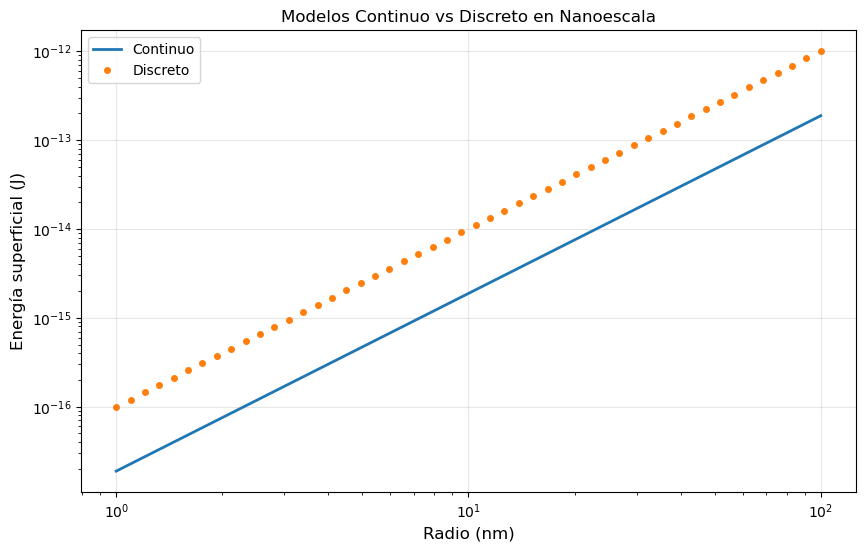

Desviación promedio: 433.1%
El modelo continuo no es válido (desviación < 10%) para ningún radio en el rango probado.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Modelo Continuo: Tensión superficial de una gota
def surface_energy_continuum(radius, gamma=1.5):  # J/m²
    """Modelo continuo de energía superficial"""
    return 4 * np.pi * radius**2 * gamma

# Modelo Discreto: Nanopartícula con átomos individuales
def surface_energy_discrete(n_atoms, atom_area=1e-20):  # m²
    """Modelo discreto contando átomos superficiales"""
    # Aproximación esférica: N_surf ≈ 4̠R²/a²
    # donde a es el parámetro de red
    radius = (3 * n_atoms * (4e-10)**3 / (4 * np.pi))**(1/3)
    n_surface = int(4 * np.pi * radius**2 / atom_area)
    energy_per_atom = 0.5  # eV
    return n_surface * energy_per_atom * 1.6e-19  # Joules

# Comparación
radii = np.logspace(-9, -7, 50)  # 1 nm a 100 nm
atoms = (4 * np.pi * radii**3 / 3) / (4e-10)**3

E_continuum = [surface_energy_continuum(r) for r in radii]
E_discrete = [surface_energy_discrete(int(n)) for n in atoms]

plt.figure(figsize=(10, 6))
plt.loglog(radii*1e9, E_continuum, label='Continuo', linewidth=2)
plt.loglog(radii*1e9, E_discrete, 'o', label='Discreto', markersize=4)
plt.xlabel('Radio (nm)', fontsize=12)
plt.ylabel('Energía superficial (J)', fontsize=12)
plt.title('Modelos Continuo vs Discreto en Nanoescala')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Desviación relativa
deviation = np.abs((np.array(E_continuum) - np.array(E_discrete)) / np.array(E_continuum))
print(f"Desviación promedio: {np.mean(deviation)*100:.1f}%")

# Verificar si hay radios donde la desviación sea menor a 0.1
valid_radii = radii[deviation < 0.1]
if len(valid_radii) > 0:
    print(f"Modelo continuo válido para R > {valid_radii[0]*1e9:.1f} nm")
else:
    print("El modelo continuo no es válido (desviación < 10%) para ningún radio en el rango probado.") 

Según los resultados, la desviación promedio entre ambos modelos es del $433.1\%$. Esto significa que el modelo continuo no es válido (con una desviación inferior al $10\%$) para ningún radio dentro del rango probado (de $1$ nm a $100$ nm). **Esto es esperable, ya que los modelos continuos suelen perder precisión a nanoescala.**

# 6. Fundamentos de Mecánica Cuántica Computacional

## 6.1. Ecuación de Schrödinger para Sistemas de Muchos Cuerpos

La base de toda la química computacional es la ecuación de Schrödinger dependiente del tiempo:

$$i\hbar \frac{\partial \Psi}{\partial t} = \hat{H}\Psi$$

Para estados estacionarios (independiente del tiempo):

$$\hat{H}\Psi = E\Psi$$

### 6.1.1. Hamiltoniano Molecular

Para un sistema con N electrones y M núcleos:

$$\hat{H} = \hat{T}_n + \hat{T}_e + \hat{V}_{nn} + \hat{V}_{ee} + \hat{V}_{ne}$$

Donde:
- $\displaystyle{\hat{T}_n = -\sum_{I=1}^{M} \frac{\hbar^2}{2M_I}\nabla_I^2}$ : Energía cinética nuclear
- $\displaystyle{\hat{T}_e = -\sum_{i=1}^{N} \frac{\hbar^2}{2m_e}\nabla_i^2}$ : Energía cinética electrónica
- $\displaystyle{\hat{V}_{nn} = \sum_{I<J} \frac{Z_I Z_J e^2}{|\mathbf{R}_I - \mathbf{R}_J|}}$ : Repulsión núcleo-núcleo
- $\displaystyle{\hat{V}_{ee} = \sum_{i<j} \frac{e^2}{|\mathbf{r}_i - \mathbf{r}_j|}}$ : Repulsión electrón-electrón
- $\displaystyle{\hat{V}_{ne} = -\sum_{i,I} \frac{Z_I e^2}{|\mathbf{r}_i - \mathbf{R}_I|}}$ : Atracción núcleo-electrón

### 6.1.2. Aproximación Born-Oppenheimer

**Idea clave:** Los núcleos son ~1800 veces más pesados que los electrones, por lo que se mueven mucho más lento.

**Separación de Variables:**

$$\Psi_{total}(\mathbf{r}, \mathbf{R}) \approx \psi_{electrónica}(\mathbf{r}; \mathbf{R}) \cdot \chi_{nuclear}(\mathbf{R})$$

Esto permite resolver:
1. **Problema electrónico** para posiciones nucleares fijas → energía potencial U(R)
2. **Problema nuclear** moviéndose en el potencial U(R)

**Ventaja:** Reducimos un problema de ~10²³ partículas a uno manejable computacionalmente.



### 6.1.3. 💻 Ejemplo: Molécula de H₂

El siguiente código simula y visualiza la superficie de energía potencial (SEP) para una molécula de hidrógeno (H$_₂$) utilizando un modelo simplificado basado en el potencial de Morse.

Qué hace cada parte:

1. **Modelo de Energía** (hydrogen_molecule_energy function):

   * Define una función que calcula la energía potencial de la molécula de H$_₂$ en función de la distancia internuclear ($R$) entre los dos átomos de hidrógeno. Esta función utiliza el potencial de Morse, que es un modelo que describe de manera más realista los enlaces químicos que el potencial de Lennard-Jones, ya que permite la disociación del enlace.
   * Los parámetros ($D_e, r_e, a$) del potencial de Morse se han ajustado para la molécula de H$_₂$.

2. **Generación de la Curva de Energía Potencial**:

   * Calcula la energía para un rango de distancias internucleares ($R_values$) utilizando la función hydrogen_molecule_energy para obtener $E_values$.

3. **Búsqueda del Punto de Equilibrio:**

   * Utiliza scipy.optimize.minimize_scalar para encontrar la distancia internuclear ($R_eq$) donde la energía potencial es mínima ($E_min$). Este punto representa la distancia de enlace en equilibrio de la molécula de H$_₂$ y su energía de enlace.

4. **Visualización** (matplotlib.pyplot):

   * Genera un gráfico que muestra la energía potencial en función de la distancia **H-H**.
   * La línea azul representa la curva de energía potencial.
   * Una línea horizontal punteada negra indica la energía de los átomos de hidrógeno separados (definida como $0$).
   * Un punto rojo marca el mínimo de la curva, que corresponde a la distancia de enlace de equilibrio y la energía mínima de la molécula.

5. **Resultados Impresos:**

   * Imprime la distancia de enlace en equilibrio calculada en Angstroms ($Å$).
   * Imprime la energía de enlace calculada en electronvoltios ($eV$).
   * Proporciona los valores experimentales de la distancia y energía de enlace de H$_₂$ para que puedas comparar la precisión del modelo.

En resumen, el código te permite ver cómo la energía de una molécula de H$_₂$ varía a medida que sus átomos se acercan o se separan, y cómo se encuentra su estado más estable (energía mínima) en una distancia de enlace específica.

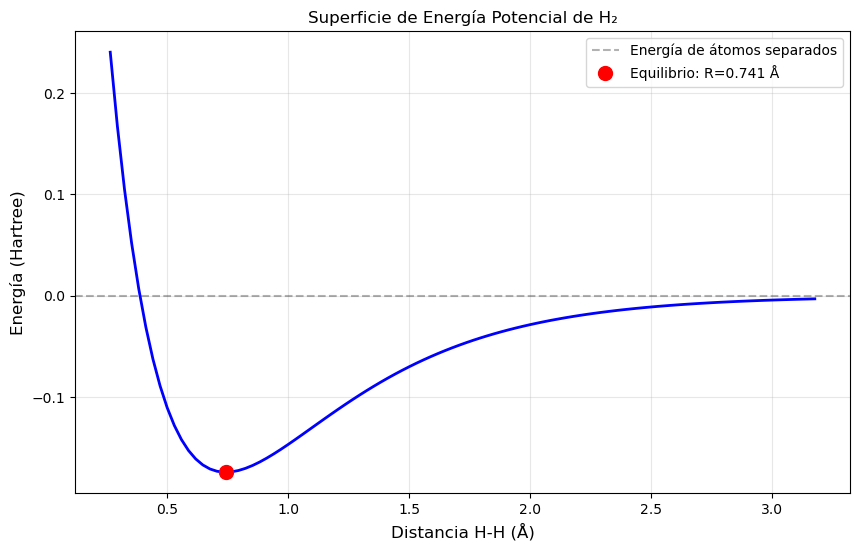

Distancia de enlace en equilibrio: 0.741 Å
Energía de enlace: 4.73 eV
(Valor experimental: 0.74 Å, 4.52 eV)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Constantes (unidades atómicas: ℏ = mₑ = e = 1)
BOHR_TO_ANGSTROM = 0.529177

def hydrogen_molecule_energy(R):
    """
    Energía aproximada de H₂ usando modelo simple
    R: distancia internuclear (Bohr radii)
    """
    # Parámetros ajustados del modelo Morse
    D_e = 0.174  # Energía de disociación (Hartree)
    r_e = 1.401  # Distancia de equilibrio (Bohr)
    a = 1.036    # Ancho del pozo

    # Potencial de Morse
    E = D_e * (1 - np.exp(-a*(R - r_e)))**2 - D_e

    return E

# Curva de energía potencial
R_values = np.linspace(0.5, 6, 100)
E_values = [hydrogen_molecule_energy(R) for R in R_values]

# Encontrar equilibrio
result = minimize_scalar(hydrogen_molecule_energy, bounds=(1, 3), method='bounded')
R_eq = result.x
E_min = result.fun

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(R_values * BOHR_TO_ANGSTROM, E_values, 'b-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3, label='Energía de átomos separados')
plt.plot(R_eq * BOHR_TO_ANGSTROM, E_min, 'ro', markersize=10,
         label=f'Equilibrio: R={R_eq*BOHR_TO_ANGSTROM:.3f} Å')
plt.xlabel('Distancia H-H (Å)', fontsize=12)
plt.ylabel('Energía (Hartree)', fontsize=12)
plt.title('Superficie de Energía Potencial de H₂')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Distancia de enlace en equilibrio: {R_eq*BOHR_TO_ANGSTROM:.3f} Å")
print(f"Energía de enlace: {-E_min*27.2114:.2f} eV")
print(f"(Valor experimental: 0.74 Å, 4.52 eV)")

## 6.2. Teoría del Funcional de la Densidad (DFT)

DFT es el método cuántico más utilizado en nanotecnología por su balance costo-precisión.

### 6.2.1. Teoremas de Hohenberg-Kohn

1. **Teorema 1:** La densidad electrónica $ρ(r)$ determina unívocamente el potencial externo $V(r)$
2. **Teorema 2:** Existe un funcional $E[ρ]$ cuyo mínimo es la energía del estado fundamental

### 6.2.2. Ecuaciones de Kohn-Sham

Transformamos el problema de muchos cuerpos en uno de partículas independientes:

$$\left[-\frac{\hbar^2}{2m}\nabla^2 + v_{eff}(\mathbf{r})\right]\phi_i(\mathbf{r}) = \varepsilon_i \phi_i(\mathbf{r})$$

Donde el potencial efectivo es:

$$v_{eff}(\mathbf{r}) = v_{ext}(\mathbf{r}) + \int \frac{\rho(\mathbf{r}')}{|\mathbf{r}-\mathbf{r}'|}d\mathbf{r}' + v_{xc}[\rho(\mathbf{r})]$$

**Componentes:**
- $v_{ext}$: Potencial de los núcleos
- 2do término: Repulsión electrostática (Hartree)
- $v_{xc}$: Potencial de intercambio-correlación (aproximado)

### 6.2.3. Funcionales de Intercambio-Correlación Comunes

| Funcional | Tipo | Aplicaciones en Nanotecnología |
|-----------|------|--------------------------------|
| **LDA** | Local | Estructuras metálicas simples |
| **PBE** | GGA | General, nanopartículas metálicas |
| **B3LYP** | Híbrido | Moléculas orgánicas, nanotubos |
| **HSE06** | Híbrido screened | Semiconductores, bandgaps |




### 6.2.4. 💻 Ejemplo: Cálculo DFT con ASE

El código que me has proporcionado realiza una simulación y análisis de una nanopartícula de oro (Au) utilizando la biblioteca [redacted link]. A continuación, te detallo qué hace cada parte:

1. Inicialización y Creación de la Nanopartícula:

   * Importa las bibliotecas necesarias de ase (Atoms, EMT, BFGS, Icosahedron) y matplotlib.pyplot para visualización.
   * Crea una nanopartícula de oro con geometría icosaédrica y 13 átomos (Icosahedron('Au', noshells=2)). Un icosaedro es una geometría común y estable para clusters pequeños.

2. Configuración de la Calculadora:

   * Asigna una calculadora (atoms.calc = EMT()) a los átomos. EMT (Embedded Atom Method) es un potencial empírico simple que se utiliza aquí como una aproximación rápida para calcular las energías y fuerzas interatómicas. En un cálculo DFT real, usarías calculadoras más precisas como GPAW o Quantum ESPRESSO.

3. Optimización de Geometría:

   * Calcula la energía inicial de la nanopartícula antes de cualquier ajuste estructural.
   * Utiliza el algoritmo BFGS (BFGS(atoms, ...)) para optimizar la geometría. Este algoritmo ajusta las posiciones de los átomos para encontrar una configuración de mínima energía, es decir, la estructura más estable de la nanopartícula. El proceso se detiene cuando las fuerzas sobre los átomos son menores que un valor (fmax=0.05 eV/Å).
   * Almacena el proceso de optimización en un archivo de trayectoria (Au13_opt.traj) y un archivo de registro (optimization.log).
   * Calcula la energía final y la ganancia de energía (diferencia entre la energía inicial y final), lo que indica cuánto más estable se volvió la nanopartícula después de la optimización.

4. Análisis Estructural:

   * Obtiene las posiciones de los átomos después de la optimización.
   * Calcula el centro de masa de la nanopartícula y las distancias de cada átomo a este centro.
   * Imprime las distancias mínima, máxima y promedio al centro, lo que da una idea del tamaño y la forma de la nanopartícula.

5. Cálculo de Propiedades Adicionales:

   * Estima el volumen aproximado de la nanopartícula basándose en su radio máximo.
   * Calcula la densidad atómica (número de átomos por unidad de volumen).


In [16]:
from ase import Atoms
from ase.calculators.emt import EMT  # EMT: potencial empírico simple
from ase.optimize import BFGS
from ase.visualize import view
import matplotlib.pyplot as plt

# Crear nanopartícula de oro pequeña (cluster de 13 átomos)
# Geometría icosaédrica
from ase.cluster import Icosahedron

# Crear cluster
atoms = Icosahedron('Au', noshells=2)  # 13 átomos
print(f"Número de átomos: {len(atoms)}")

# Asignar calculadora (en producción usarías GPAW, Quantum ESPRESSO, etc.)
atoms.calc = EMT()

# Energía inicial
E_initial = atoms.get_potential_energy()
print(f"\nEnergía inicial: {E_initial:.3f} eV")

# Optimización de geometría
optimizer = BFGS(atoms, trajectory='Au13_opt.traj', logfile='optimization.log')
optimizer.run(fmax=0.05)  # Converger cuando fuerzas < 0.05 eV/Å

# Energía final
E_final = atoms.get_potential_energy()
print(f"Energía final: {E_final:.3f} eV")
print(f"Ganancia de energía: {E_initial - E_final:.3f} eV")

# Análisis de estructura
positions = atoms.get_positions()
center = positions.mean(axis=0)
distances = np.linalg.norm(positions - center, axis=1)

print(f"\nDistancias al centro:")
print(f"  Mínima: {distances.min():.3f} Å")
print(f"  Máxima: {distances.max():.3f} Å")
print(f"  Radio promedio: {distances.mean():.3f} Å")

# Visualizar estructura (opcional, requiere GUI)
# view(atoms)

# Calcular propiedades adicionales
volume = 4/3 * np.pi * (distances.max())**3
density = len(atoms) / volume
print(f"\nVolumen aproximado: {volume:.2f} ų")
print(f"Densidad atómica: {density:.4f} átomos/ų")

Número de átomos: 13

Energía inicial: 11.158 eV
Energía final: 6.597 eV
Ganancia de energía: 4.561 eV

Distancias al centro:
  Mínima: 0.000 Å
  Máxima: 2.652 Å
  Radio promedio: 2.448 Å

Volumen aproximado: 78.09 ų
Densidad atómica: 0.1665 átomos/ų


En resumen, este código simula la formación de una nanopartícula de oro, encuentra su configuración atómica más estable y luego analiza sus propiedades estructurales y energéticas.

# 7. Modelado de Nanopartículas y Nanoestructuras

## 7.1. Geometrías Fundamentales

### 7.1.1. Nanopartículas Esféricas

**Volumen y Superficie:**

$V = (\frac{4}{3})πR^³$

$A = 4πR^²$


**Relación superficie/volumen:**
$\frac{S}{V}=\frac{3}{R}$


A medida que $R$ disminuye, $\frac{S}{V}$ aumenta → comportamiento dominado por superficie.

### 7.1.2. Nanopartículas Cilíndricas (Nanotubos, Nanohilos)

**Volumen:**
$ V = πR^²L$


**Superficie:**

$A = 2πRL + 2πR^² ≈ 2πRL$  (si L >> R)


### 7.1.3. Nanopartículas Laminares (Grafeno, MoS$_₂$)

**Área:**

$A = L × W$


**Grosor:** $1-10$ capas atómicas

## 7.2. Modelos de Superficie

### 7.2.1. Tensión Superficial a Nanoescala

La energía superficial γ (J/m² o N/m) causa:
1. **Presión de Laplace** (nanopartículas esféricas):
   
   $ΔP = 2γ/R$
   

2. **Reducción del punto de fusión** (ecuación de Gibbs-Thomson):
   $T_m(R) = T_m(∞)\displaystyle{\Big[\frac{1 - 2γV_m}{(ΔH_f R)}\Big]}$
   



### 7.2.2. 💻 Ejemplo: Punto de Fusión vs Tamaño

El siguiente código simula y visualiza el fenómeno de la depresión del punto de fusión en nanopartículas, específicamente para el oro (Au). Esto ocurre cuando el punto de fusión de un material disminuye drásticamente a medida que su tamaño se reduce a la nanoescala, debido al aumento de la relación **superficie/volumen**.

Explicación de cada parte del código:

1. **Función melting_point(radius, ...)**:

   * Define una función que calcula el punto de fusión de una nanopartícula ($T_m$) en función de su radio (`radius`).
   * Utiliza la ecuación de **Gibbs-Thomson para la depresión del punto de fusión**, que considera el punto de fusión a granel ($T_{bulk}$), la energía superficial (`gamma`), el volumen molar ($V_m$) y la entalpía de fusión ($DHf$). Los valores por defecto de estos parámetros están ajustados para el oro.

2. **Rango de Tamaños:**

   * Se genera un rango de radios para las nanopartículas, desde $1$ nm hasta $50$ nm (`radii_nm`), y se convierten a metros (`radii_m`) para que sean consistentes con las unidades de la ecuación.

3. **Cálculo de Temperaturas:**

   * La función `melting_point` se aplica a cada radio en el rango para obtener una lista de puntos de fusión ($T_m$) correspondientes a cada tamaño de nanopartícula.

4. **Graficación (matplotlib.pyplot):**

   * Se crea un gráfico que muestra el punto de fusión en función del radio de la nanopartícula (en nm).
   * La línea azul representa los puntos de fusión calculados por el modelo.
   * Una línea roja discontinua (`plt.axhline`) indica el punto de fusión del oro a granel (#1337 K#) para comparación.
   * Se añaden etiquetas a los ejes, un título y una leyenda para mayor claridad.
   * **Datos experimentales**: Se incluyen algunos puntos (`exp_radii`, `exp_temps`) para mostrar cómo el modelo se compara con observaciones experimentales aproximadas, aunque en este ejemplo particular hay una gran discrepancia para radios muy pequeños.

5. Análisis:

Al final, el código calcula e imprime la reducción del punto de fusión para nanopartículas de oro de $2, 5$ y $10$ nm, comparándolas con el punto de fusión del oro a granel.


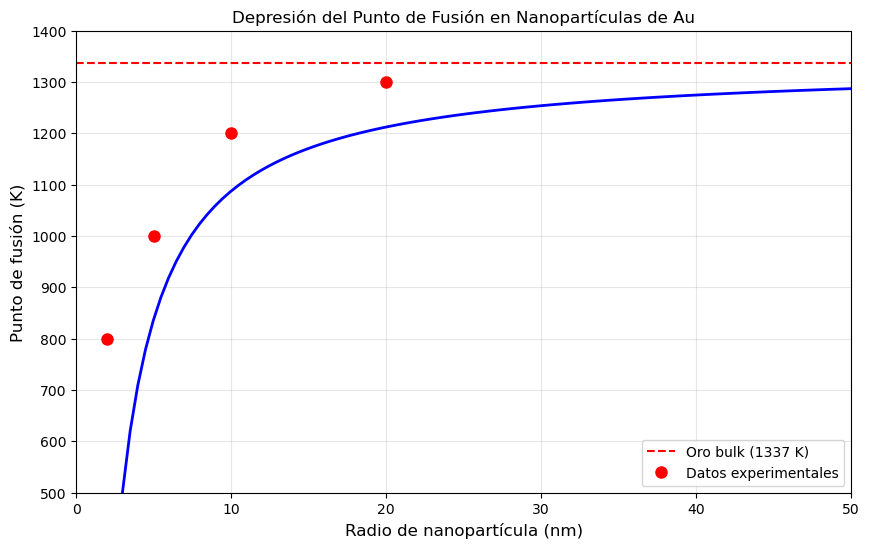

Reducción del punto de fusión:
  R = 2 nm: T_m = 91 K (reducción de 1246 K)
  R = 5 nm: T_m = 839 K (reducción de 498 K)
  R = 10 nm: T_m = 1088 K (reducción de 249 K)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def melting_point(radius, T_bulk=1337, gamma=1.128, V_m=10.21e-6, DHf=12.36e3):
    """
    Calcula punto de fusión de nanopartículas de Au
    T_bulk: Temperatura de fusión bulk (K)
    gamma: Energía superficial (J/m²)
    V_m: Volumen molar (m³/mol)
    DHf: Entalpía de fusión (J/mol)
    """
    return T_bulk * (1 - (2 * gamma * V_m) / (DHf * radius))

# Rango de tamaños
radii_nm = np.linspace(1, 50, 100)
radii_m = radii_nm * 1e-9

# Calcular temperaturas
T_m = [melting_point(r) for r in radii_m]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(radii_nm, T_m, 'b-', linewidth=2)
plt.axhline(y=1337, color='r', linestyle='--', label='Oro bulk (1337 K)')
plt.xlabel('Radio de nanopartícula (nm)', fontsize=12)
plt.ylabel('Punto de fusión (K)', fontsize=12)
plt.title('Depresión del Punto de Fusión en Nanopartículas de Au')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)
plt.ylim(500, 1400)

# Agregar datos experimentales aproximados
exp_radii = [2, 5, 10, 20]
exp_temps = [800, 1000, 1200, 1300]
plt.plot(exp_radii, exp_temps, 'ro', markersize=8, label='Datos experimentales')
plt.legend()
plt.show()

# Análisis
print("Reducción del punto de fusión:")
for r in [2, 5, 10]:
    T = melting_point(r*1e-9)
    reduction = 1337 - T
    print(f"  R = {r} nm: T_m = {T:.0f} K (reducción de {reduction:.0f} K)") 

En resumen, este código ilustra cómo el tamaño de una nanopartícula influye drásticamente en su punto de fusión, demostrando que las propiedades de los nanomateriales pueden ser muy diferentes a las de sus contrapartes a granel.

##Efectos de Tamaño Finito y Cuánticos
###Confinamiento Cuántico

Cuando el tamaño característico de una nanopartícula es comparable con la longitud de onda de De Broglie de los electrones, el movimiento electrónico deja de ser continuo y aparecen efectos de confinamiento cuántico. La longitud de onda de De Broglie se define como

$ \lambda_{\text{De Broglie}} = \dfrac{h}{p} = \dfrac{h}{\sqrt{2 m^{*} E}} $

donde $h$ es la constante de Planck, $p$ el momento lineal del electrón, $m^{*}$ la masa efectiva del portador y $E$ su energía cinética.

Bajo estas condiciones se produce la cuantización de los niveles de energía, lo cual puede modelarse mediante potenciales de confinamiento ideales.

Modelo de partícula en una caja unidimensional

Para un portador confinado en una región unidimensional de longitud $L$, los niveles de energía permitidos están dados por

$ E_n = \dfrac{n^{2} h^{2}}{8 m L^{2}}, \qquad n = 1, 2, 3, \ldots $

donde $n$ es el número cuántico principal.

Confinamiento tridimensional con simetría esférica

En el caso de un pozo de potencial esférico, una aproximación para los niveles de energía es

$ E_{n,l} = \dfrac{\hbar^{2}}{2 m^{*} R^{2}} , \alpha_{n,l}^{2} $

donde $R$ es el radio de la nanopartícula, $\hbar$ la constante de Planck reducida y $\alpha_{n,l}$ son las raíces adimensionales determinadas por las condiciones de frontera del problema radial, asociadas a los números cuánticos $n$ y $l$.

Dependencia del Bandgap con el Tamaño

En semiconductores nanoestructurados, como los puntos cuánticos, el ancho de la banda prohibida depende explícitamente del tamaño de la nanopartícula. Una expresión ampliamente utilizada para describir este efecto es

$ E_g(R) = E_g(\infty) + \dfrac{\hbar^{2} \pi^{2}}{2 R^{2}} \left( \dfrac{1}{m_e^{}} + \dfrac{1}{m_h^{}} \right) - \dfrac{1.8 , e^{2}}{4 \pi \varepsilon R} $

donde:

 * $E_g(\infty)$ representa el bandgap del material en volumen (bulk),

 * el segundo término corresponde a la energía de confinamiento cuántico de electrones y huecos,

 * el tercer término describe la interacción coulómbica electrón–hueco, responsable de una corrección atractiva al bandgap efectivo.

### 7.2.3. 💻 Ejemplo: Bandgap de Puntos Cuánticos CdSe

El siguiente código simula y visualiza el fenómeno de la **dependencia del bandgap con el tamaño** en puntos cuánticos de CdSe, un concepto fundamental del **confinamiento cuántico**. En particular, demuestra cómo el color de la luz emitida por un punto cuántico, es decir, su fotoluminiscencia, puede **sintonizarse** (modificarse) de manera controlada simplemente variando su tamaño.

A continuación se explica cada parte del código.

---

1. **Función `quantum_dot_bandgap(radius, ...)`**

* Esta función define la ecuación utilizada para calcular el bandgap $E_g$ de un punto cuántico en función de su radio (`radius`). La formulación se basa en la **aproximación de Brus** y considera tres términos principales:

   * **`Eg_bulk`**: corresponde al bandgap del material en su forma masiva (bulk). Para el CdSe se adopta el valor $E_g = 1.74 , \text{eV}$.

   * **`confinement`**: representa la energía de confinamiento cuántico, la cual aumenta a medida que el radio del punto cuántico disminuye. Este término depende de las masas efectivas del electrón ($m_e^{*}$) y del hueco ($m_h^{*}$).

   * **`coulomb`**: describe la interacción coulómbica entre el electrón y el hueco, asociada a la energía excitónica. Este término tiende a reducir el bandgap efectivo y depende de la constante dieléctrica relativa ($\varepsilon$) del material.

* El código maneja explícitamente las constantes físicas fundamentales, tales como $\hbar$, $m_0$, $e$ y $\varepsilon_0$, así como las conversiones de unidades necesarias, garantizando la coherencia dimensional de los cálculos.

2. **Rango de tamaños y cálculo de bandgaps**

   * Se define un rango de radios para los puntos cuánticos, típicamente desde $1 , \text{nm}$ hasta $10 , \text{nm}$.
   * La función `quantum_dot_bandgap` se aplica a cada valor del radio para calcular la lista correspondiente de valores del bandgap $E_g(R)$.

3. **Conversión de bandgap a longitud de onda de emisión**

   * El bandgap, expresado en electronvolts, se convierte a la longitud de onda de la luz emitida, en nanómetros, utilizando la relación

$ \lambda (\text{nm}) = \dfrac{1240}{E (\text{eV})} $

Esta conversión es esencial, ya que el color de la luz emitida por un punto cuántico está directamente relacionado con su bandgap.

4. **Visualización (`matplotlib.pyplot`)**

* El código genera una figura compuesta por dos subgráficos:

   * **Subgráfico 1 (izquierda): “Efecto del Tamaño en el Bandgap”**
     * Muestra cómo el bandgap de los puntos cuánticos aumenta conforme su radio disminuye. La línea roja punteada indica el valor del bandgap del CdSe en estado masivo, utilizada como referencia comparativa.

   * **Subgráfico 2 (derecha): “Color de Fotoluminiscencia”**
     * Muestra cómo la longitud de onda de emisión, y por tanto el color de la luz, se desplaza hacia longitudes de onda más cortas (región azul del espectro) para radios pequeños, y hacia longitudes de onda más largas (región roja) para radios mayores. Las bandas de color generadas con `plt.axhspan` facilitan la visualización de la correspondencia entre longitud de onda y color percibido.

5. **Análisis impreso**

   * Finalmente, el código imprime ejemplos concretos de valores de bandgap y de longitudes de onda de emisión para puntos cuánticos con radios de $2$, $3$, $4$ y $5 , \text{nm}$. Estos resultados ilustran de manera cuantitativa la **tunabilidad del color** de la emisión óptica en función del tamaño del punto cuántico.




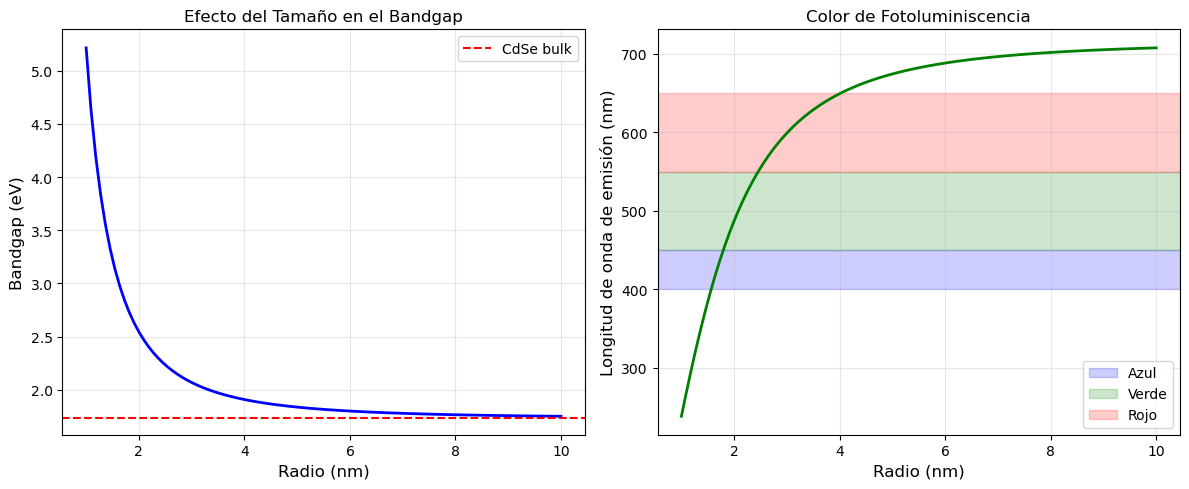

Tunabilidad del color:
  R = 2 nm: Eg = 2.54 eV, λ = 487 nm
  R = 3 nm: Eg = 2.07 eV, λ = 599 nm
  R = 4 nm: Eg = 1.91 eV, λ = 649 nm
  R = 5 nm: Eg = 1.84 eV, λ = 675 nm


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def quantum_dot_bandgap(radius, Eg_bulk=1.74, me_eff=0.13, mh_eff=0.45, epsilon=10.2):
    """
    Calcula bandgap de puntos cuánticos de CdSe
    radius: radio en nm
    Eg_bulk: bandgap bulk (eV)
    me_eff, mh_eff: masas efectivas (en unidades de masa del electrón)
    epsilon: constante dieléctrica relativa
    """
    r_m = radius * 1e-9  # Convertir a metros

    # Constantes
    hbar = 1.054571817e-34  # J·s
    m0 = 9.1093837015e-31   # kg
    e = 1.602176634e-19     # C
    epsilon0 = 8.854187817e-12  # F/m

    # Término de confinamiento
    confinement = (hbar**2 * np.pi**2) / (2 * r_m**2)
    confinement *= (1/(me_eff * m0) + 1/(mh_eff * m0))
    confinement /= e  # Convertir a eV

    # Término coulómbico
    coulomb = -(1.8 * e**2) / (4 * np.pi * epsilon * epsilon0 * r_m)
    coulomb /= e  # Convertir a eV

    return Eg_bulk + confinement + coulomb

# Rango de tamaños
radii = np.linspace(1, 10, 100)  # 1-10 nm
bandgaps = [quantum_dot_bandgap(r) for r in radii]

# Convertir bandgap a longitud de onda (color de emisión)
wavelengths = [1240 / Eg for Eg in bandgaps]  # λ(nm) = 1240/E(eV)

plt.figure(figsize=(12, 5))

# Subplot 1: Bandgap vs tamaño
plt.subplot(1, 2, 1)
plt.plot(radii, bandgaps, 'b-', linewidth=2)
plt.axhline(y=1.74, color='r', linestyle='--', label='CdSe bulk')
plt.xlabel('Radio (nm)', fontsize=12)
plt.ylabel('Bandgap (eV)', fontsize=12)
plt.title('Efecto del Tamaño en el Bandgap')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Color de emisión vs tamaño
plt.subplot(1, 2, 2)
plt.plot(radii, wavelengths, 'g-', linewidth=2)
plt.xlabel('Radio (nm)', fontsize=12)
plt.ylabel('Longitud de onda de emisión (nm)', fontsize=12)
plt.title('Color de Fotoluminiscencia')
plt.axhspan(400, 450, alpha=0.2, color='blue', label='Azul')
plt.axhspan(450, 550, alpha=0.2, color='green', label='Verde')
plt.axhspan(550, 650, alpha=0.2, color='red', label='Rojo')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Tunabilidad del color:")
for r in [2, 3, 4, 5]:
    Eg = quantum_dot_bandgap(r)
    wavelength = 1240 / Eg
    print(f"  R = {r} nm: Eg = {Eg:.2f} eV, λ = {wavelength:.0f} nm")

En conjunto, este código proporciona una herramienta clara e intuitiva para comprender cómo el **confinamiento cuántico a escala nanométrica** modifica las propiedades electrónicas de los semiconductores y permite el control preciso de sus propiedades ópticas, en particular el color de la luz emitida por puntos cuánticos.


# 8. Campos de Fuerza y Potenciales Interatómicos

Los potenciales interatómicos describen cómo interactúan los átomos sin resolver la ecuación de Schrödinger completa.

## 8.1. Potenciales de Pares

### 8.1.1. Potencial de Lennard-Jones (12-6)

El más usado para gases nobles y moléculas simples:

$$\displaystyle{V_{LJ}(r) = 4\varepsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right]}$$

- $\varepsilon$: Profundidad del pozo (energía)
- $\sigma$: Distancia donde V = 0
- $r_{min} = 2^{1/6}\sigma \approx 1.12\sigma$

**Términos físicos:**
- $r^{-12}$: Repulsión de Pauli (empírico)
- $r^{-6}$: Atracción de Van der Waals (dipolo-dipolo inducido)

### 8.1.2. Potencial de Morse

Más realista para enlaces covalentes:

$$\displaystyle{V_{Morse}(r) = D_e \left[1 - e^{-a(r-r_e)}\right]^2 - D_e}$$

- $D_e$: Energía de disociación
- $r_e$: Longitud de enlace en equilibrio
- $a$: Controla el ancho del pozo

**Ventaja:** Permite disociación del enlace.


### 8.1.3. 💻 Ejemplo: Comparación de Potenciales


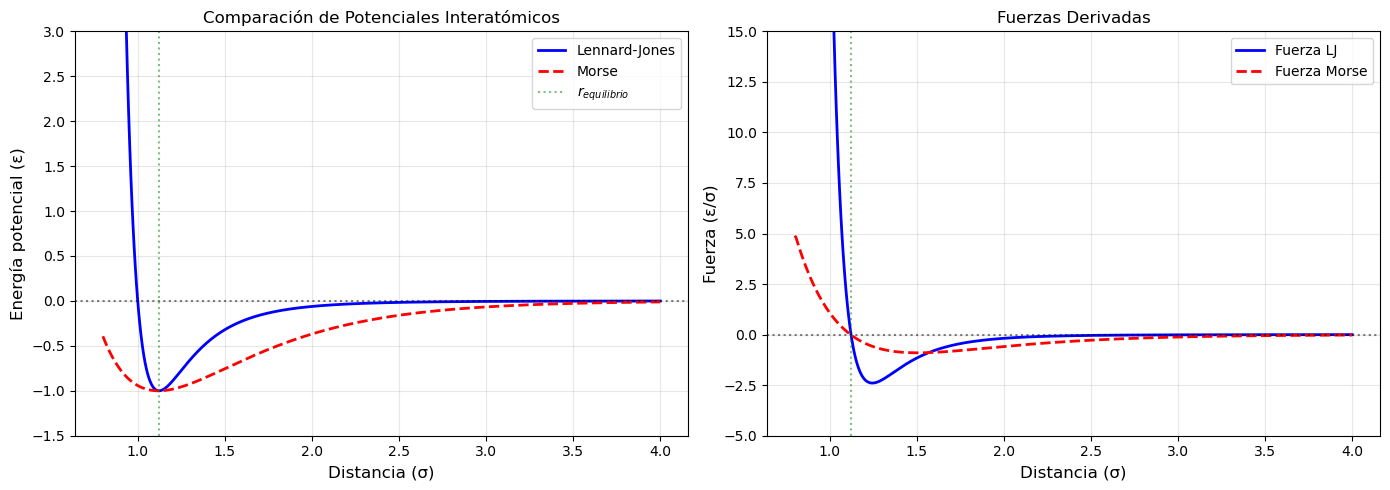

Comparación en el equilibrio:
  Lennard-Jones: V_min = -0.9999 ε
  Morse: V_min = -1.0000 ε


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones(r, epsilon=1.0, sigma=1.0):
    """Potencial de Lennard-Jones"""
    return 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

def morse(r, De=1.0, re=1.0, a=1.5):
    """Potencial de Morse"""
    return De * (1 - np.exp(-a*(r - re)))**2 - De

# Rango de distancias
r = np.linspace(0.8, 4, 500)

# Calcular potenciales
V_LJ = lennard_jones(r, epsilon=1.0, sigma=1.0)
V_Morse = morse(r, De=1.0, re=1.12, a=1.8)

# Calcular fuerzas (F = -dV/dr)
dr = r[1] - r[0]
F_LJ = -np.gradient(V_LJ, dr)
F_Morse = -np.gradient(V_Morse, dr)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Potenciales
ax1.plot(r, V_LJ, 'b-', linewidth=2, label='Lennard-Jones')
ax1.plot(r, V_Morse, 'r--', linewidth=2, label='Morse')
ax1.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax1.axvline(x=1.12, color='g', linestyle=':', alpha=0.5, label=r'$r_{equilibrio}$')
ax1.set_xlabel('Distancia (σ)', fontsize=12)
ax1.set_ylabel('Energía potencial (ε)', fontsize=12)
ax1.set_title('Comparación de Potenciales Interatómicos')
ax1.set_ylim(-1.5, 3)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Fuerzas
ax2.plot(r, F_LJ, 'b-', linewidth=2, label='Fuerza LJ')
ax2.plot(r, F_Morse, 'r--', linewidth=2, label='Fuerza Morse')
ax2.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax2.axvline(x=1.12, color='g', linestyle=':', alpha=0.5)
ax2.set_xlabel('Distancia (σ)', fontsize=12)
ax2.set_ylabel('Fuerza (ε/σ)', fontsize=12)
ax2.set_title('Fuerzas Derivadas')
ax2.set_ylim(-5, 15)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis numérico
print("Comparación en el equilibrio:")
r_eq_idx = np.argmin(np.abs(r - 1.12))
print(f"  Lennard-Jones: V_min = {V_LJ[r_eq_idx]:.4f} ε")
print(f"  Morse: V_min = {V_Morse[r_eq_idx]:.4f} ε")

## 8.2. Potenciales de Muchos Cuerpos

### 8.2.1. Embedded Atom Method (EAM)

Usado para metales (FCC, BCC):

$$\displaystyle{E_{total} = \sum_i F_i(\rho_i) + \frac{1}{2}\sum_{i \neq j}\phi_{ij}(r_{ij})}$$

- $F_i(\rho_i)$: Energía de inmersión del átomo i en la densidad electrónica
- $\displaystyle{\rho_i = \sum_{j \neq i} f_j(r_{ij})}$: Densidad electrónica en el sitio i
- $\phi_{ij}(r_{ij})$: Interacción de pares

**Ventaja:** Captura efectos cooperativos (no aditivos por pares).

### 8.2.2. Potencial de Tersoff

Para enlacesovalentes (Si, C, SiC):

$$\displaystyle{E = \sum_i \sum_{j > i} V_{ij}}$$

$$\displaystyle{V_{ij} = f_C(r_{ij})[f_R(r_{ij}) + b_{ij}f_A(r_{ij})]}$$

- $f_R$: Término repulsivo
- $f_A$: Término atractivo  
- $b_{ij}$: **Factor de orden de enlace** (depende del entorno angular)

**Aplicación:** Nanotubos de carbono, grafeno, nanohilos de silicio.


### 8.2.3. 💻 Ejemplo: Simulación con EAM


Ejecutando dinámica molecular...


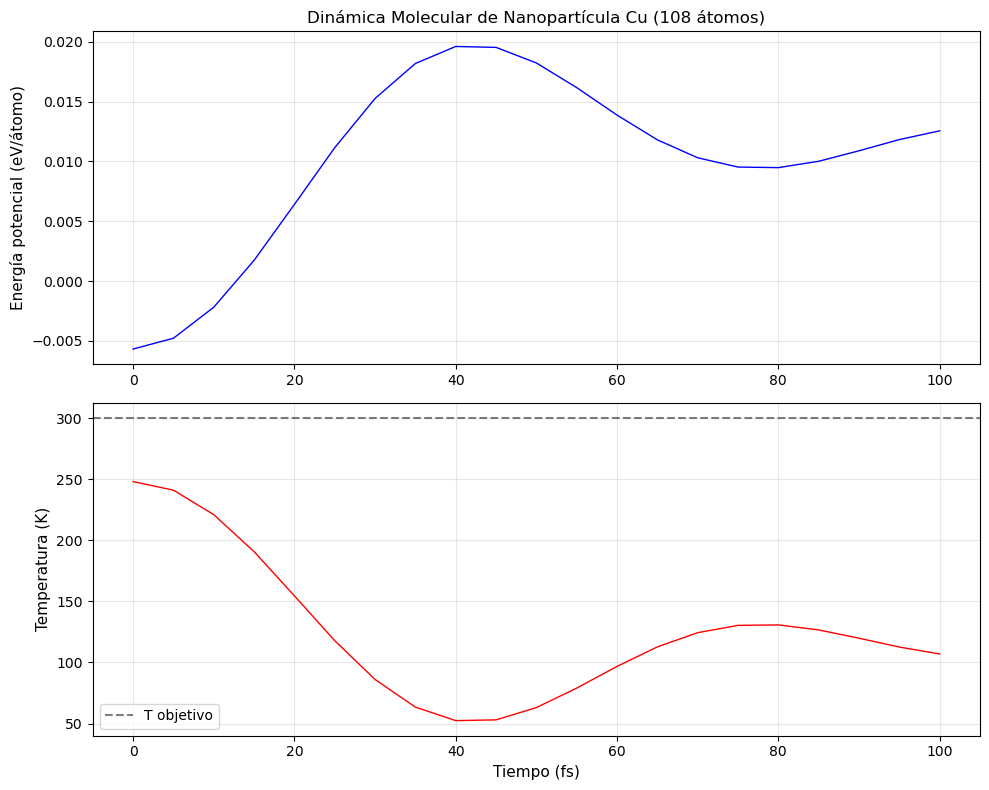


Estadísticas de la simulación:
  Energía promedio: 0.0102 eV/átomo
  Temperatura promedio: 125.3 K
  Desviación estándar T: 56.2 K


In [11]:
from ase import Atoms
from ase.lattice.cubic import FaceCenteredCubic
from ase.calculators.emt import EMT  # Approximación de EAM
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units
import numpy as np
import matplotlib.pyplot as plt

# Crear nanopartícula cúbica de cobre
size = 3  # Número de celdas unitarias
atoms = FaceCenteredCubic('Cu', size=(size, size, size), latticeconstant=3.61)

# Asignar calculadora EAM (EMT es aproximación rápida)
atoms.calc = EMT()

# Inicializar velocidades (300 K)
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# Crear simulador de dinámica molecular
dt = 1.0 * units.fs  # Paso de tiempo: 1 femtosegundo
dyn = VelocityVerlet(atoms, dt)

# Arrays para almacenar resultados
energies = []
temperatures = []
times = []

def collect_data():
    """Callback para recolectar datos durante la simulación"""
    energies.append(atoms.get_potential_energy() / len(atoms))
    temperatures.append(atoms.get_temperature())
    times.append(dyn.get_number_of_steps() * dt / units.fs)

# Adjuntar observer
dyn.attach(collect_data, interval=5)

# Ejecutar simulación (100 pasos = 100 fs)
print("Ejecutando dinámica molecular...")
dyn.run(100)

# Visualizar resultados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Energía potencial
ax1.plot(times, energies, 'b-', linewidth=1)
ax1.set_ylabel('Energía potencial (eV/átomo)', fontsize=11)
ax1.set_title(f'Dinámica Molecular de Nanopartícula Cu ({len(atoms)} átomos)')
ax1.grid(True, alpha=0.3)

# Temperatura
ax2.plot(times, temperatures, 'r-', linewidth=1)
ax2.axhline(y=300, color='k', linestyle='--', alpha=0.5, label='T objetivo')
ax2.set_xlabel('Tiempo (fs)', fontsize=11)
ax2.set_ylabel('Temperatura (K)', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de la simulación:")
print(f"  Energía promedio: {np.mean(energies):.4f} eV/átomo")
print(f"  Temperatura promedio: {np.mean(temperatures):.1f} K")
print(f"  Desviación estándar T: {np.std(temperatures):.1f} K")

## 8.3. Campos de Fuerza Reactivos: ReaxFF

ReaxFF permite formar/romper enlaces dinámicamente:

$$\displaystyle{E_{total} = E_{bond} + E_{over} + E_{under} + E_{val} + E_{tors} + E_{vdW} + E_{Coulomb}}$$

**Características:**
- Orden de enlace dependiente de la distancia
- Transferencia de carga (QEq)
- Ángulos y torsiones
- Aplicaciones: Combustión, crecimiento CVD, reacciones en superficies

**Limitación:** Parametrización compleja (requiere DFT training data).

---

# 9. 📝 PRÁCTICA 1: Construcción y Análisis de Nanopartículas

## 9.1. Objetivos

1. Construir modelos de nanopartículas con diferentes geometrías
2. Calcular propiedades estructurales y energéticas
3. Optimizar geometría usando potenciales interatómicos
4. Analizar efectos de tamaño

## 9.2. Parte A: Nanopartículas Metálicas

### 9.2.1. Ejercicio 1.1: Cluster de Oro Icosaédrico



Cluster con 1 capas:
  Átomos totales: 1
  Átomos de superficie: 0 (0.0%)
  Radio promedio: 0.00 Å
  Energía/átomo: 3.8000 eV

Cluster con 2 capas:
  Átomos totales: 13
  Átomos de superficie: 12 (92.3%)
  Radio promedio: 2.45 Å
  Energía/átomo: 0.5074 eV

Cluster con 3 capas:
  Átomos totales: 55
  Átomos de superficie: 42 (76.4%)
  Radio promedio: 4.31 Å
  Energía/átomo: 0.3164 eV

Cluster con 4 capas:
  Átomos totales: 147
  Átomos de superficie: 92 (62.6%)
  Radio promedio: 6.12 Å
  Energía/átomo: 0.2287 eV


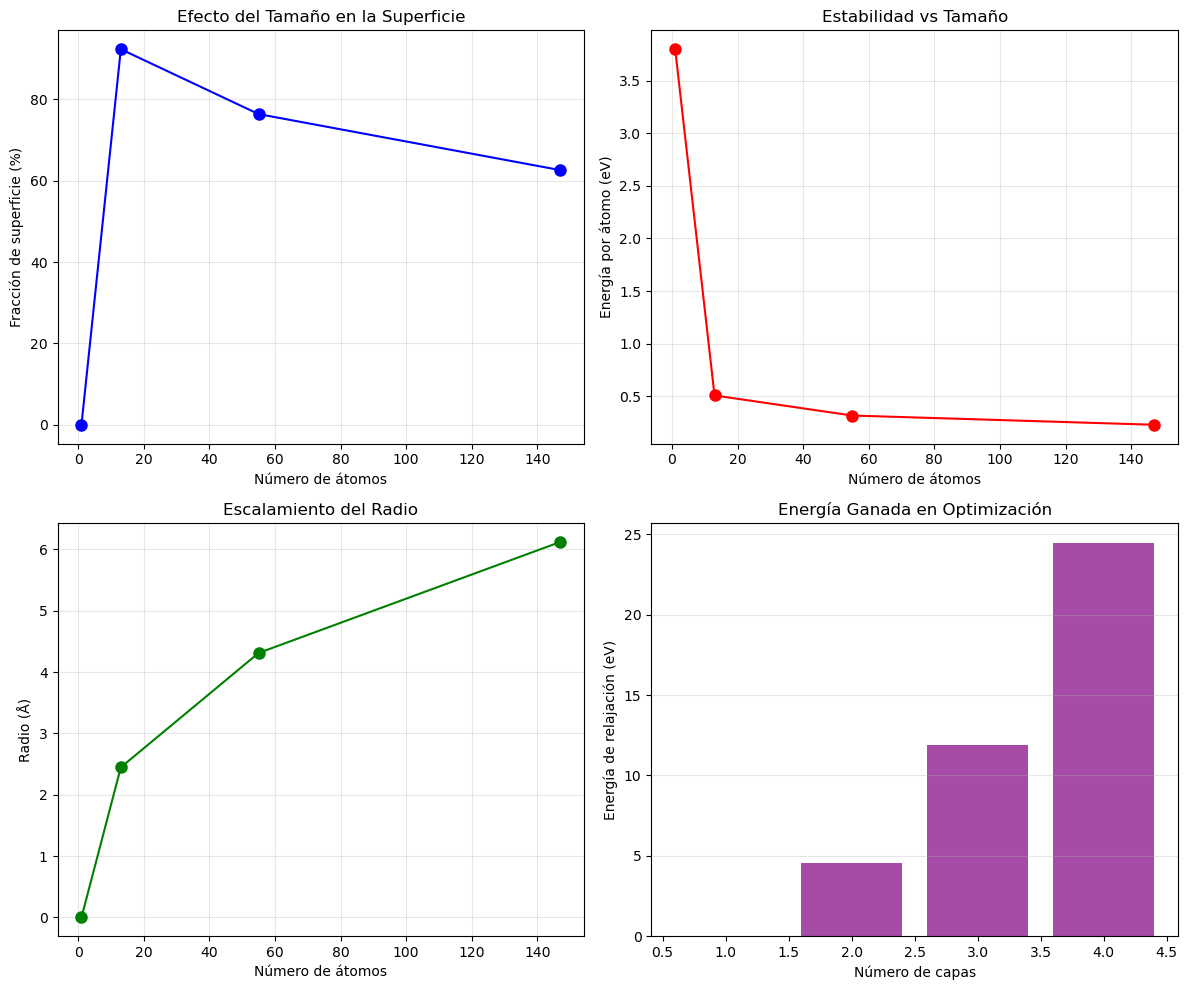

In [12]:
from ase.cluster import Icosahedron
from ase.calculators.emt import EMT
from ase.optimize import BFGS
from ase.io import write
import numpy as np
import matplotlib.pyplot as plt

# Crear serie de nanopartículas de diferentes tamaños
sizes = [1, 2, 3, 4]  # Número de capas
results = []

for noshells in sizes:
    # Crear cluster
    atoms = Icosahedron('Au', noshells=noshells)
    atoms.calc = EMT()
    
    # Energía antes de optimizar
    E_initial = atoms.get_potential_energy()
    
    # Optimizar
    opt = BFGS(atoms, logfile=None)
    opt.run(fmax=0.01)
    
    # Energía después de optimizar
    E_final = atoms.get_potential_energy()
    
    # Análisis
    n_atoms = len(atoms)
    positions = atoms.get_positions()
    center = positions.mean(axis=0)
    radii = np.linalg.norm(positions - center, axis=1)
    
    # Contar átomos de superficie (distancia > 80% del radio máximo)
    threshold = 0.8 * radii.max()
    n_surface = np.sum(radii > threshold)
    
    results.append({
        'noshells': noshells,
        'n_atoms': n_atoms,
        'n_surface': n_surface,
        'surface_fraction': n_surface / n_atoms,
        'radius': radii.mean(),
        'E_per_atom': E_final / n_atoms,
        'E_optimization': E_initial - E_final
    })
    
    # Guardar estructura
    write(f'Au_cluster_{noshells}.xyz', atoms)
    
    print(f"\nCluster con {noshells} capas:")
    print(f"  Átomos totales: {n_atoms}")
    print(f"  Átomos de superficie: {n_surface} ({n_surface/n_atoms*100:.1f}%)")
    print(f"  Radio promedio: {radii.mean():.2f} Å")
    print(f"  Energía/átomo: {E_final/n_atoms:.4f} eV")

# Graficar resultados
import pandas as pd
df = pd.DataFrame(results)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Fracción de superficie vs tamaño
axes[0, 0].plot(df['n_atoms'], df['surface_fraction']*100, 'bo-', markersize=8)
axes[0, 0].set_xlabel('Número de átomos')
axes[0, 0].set_ylabel('Fracción de superficie (%)')
axes[0, 0].set_title('Efecto del Tamaño en la Superficie')
axes[0, 0].grid(True, alpha=0.3)

# Energía por átomo vs tamaño
axes[0, 1].plot(df['n_atoms'], df['E_per_atom'], 'ro-', markersize=8)
axes[0, 1].set_xlabel('Número de átomos')
axes[0, 1].set_ylabel('Energía por átomo (eV)')
axes[0, 1].set_title('Estabilidad vs Tamaño')
axes[0, 1].grid(True, alpha=0.3)

# Radio vs número de átomos
axes[1, 0].plot(df['n_atoms'], df['radius'], 'go-', markersize=8)
axes[1, 0].set_xlabel('Número de átomos')
axes[1, 0].set_ylabel('Radio (Å)')
axes[1, 0].set_title('Escalamiento del Radio')
axes[1, 0].grid(True, alpha=0.3)

# Ganancia de energía por optimización
axes[1, 1].bar(df['noshells'], df['E_optimization'], color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Número de capas')
axes[1, 1].set_ylabel('Energía de relajación (eV)')
axes[1, 1].set_title('Energía Ganada en Optimización')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('analisis_nanoparticulas_Au.png', dpi=300)
plt.show()


### 9.2.2. Ejercicio 1.2: Comparación de Geometrías


In [13]:
from ase.cluster import FaceCenteredCubic, Icosahedron, Decahedron
from ase.calculators.emt import EMT
from ase.optimize import BFGS
import matplotlib.pyplot as plt

# Crear diferentes geometrías con ~55 átomos
geometries = {
    'Icosahedro': Icosahedron('Au', noshells=2),  # 55 átomos
    'FCC': FaceCenteredCubic('Au', [(1,0,0), (0,1,0), (0,0,1)], 
                             [3, 3, 3], latticeconstant=4.08),  # 27 átomos
}

# Agregar decaedro manualmente (estructura más compleja)
# Para simplificar, usamos icosaedro truncado

results_geo = []

for name, atoms in geometries.items():
    atoms.calc = EMT()
    
    # Optimizar
    opt = BFGS(atoms, logfile=None)
    opt.run(fmax=0.01)
    
    # Calcular propiedades
    E_total = atoms.get_potential_energy()
    n_atoms = len(atoms)
    E_per_atom = E_total / n_atoms
    
    # Volumen aproximado (casco convexo)
    positions = atoms.get_positions()
    center = positions.mean(axis=0)
    max_radius = np.linalg.norm(positions - center, axis=1).max()
    volume = (4/3) * np.pi * max_radius**3
    
    results_geo.append({
        'Geometría': name,
        'N átomos': n_atoms,
        'E/átomo (eV)': E_per_atom,
        'Volumen (ų)': volume,
        'Densidad': n_atoms / volume
    })
    
    print(f"\n{name}:")
    print(f"  Átomos: {n_atoms}")
    print(f"  Energía/átomo: {E_per_atom:.4f} eV")
    print(f"  Radio máximo: {max_radius:.2f} Å")

# Tabla comparativa
df_geo = pd.DataFrame(results_geo)
print("\n" + "="*60)
print("COMPARACIÓN DE GEOMETRÍAS")
print("="*60)
print(df_geo.to_string(index=False))
print("\nGeometría más estable (menor E/átomo):", 
      df_geo.loc[df_geo['E/átomo (eV)'].idxmin(), 'Geometría'])


Icosahedro:
  Átomos: 13
  Energía/átomo: 0.5074 eV
  Radio máximo: 2.65 Å

FCC:
  Átomos: 171
  Energía/átomo: 0.2460 eV
  Radio máximo: 9.21 Å

COMPARACIÓN DE GEOMETRÍAS
 Geometría  N átomos  E/átomo (eV)  Volumen (ų)  Densidad
Icosahedro        13      0.507447    78.092728  0.166469
       FCC       171      0.246047  3269.521455  0.052301

Geometría más estable (menor E/átomo): FCC



## 9.3. Parte B: Análisis de Enlace

### 9.3.1. Ejercicio 1.3: Distribución Radial de Pares (RDF)


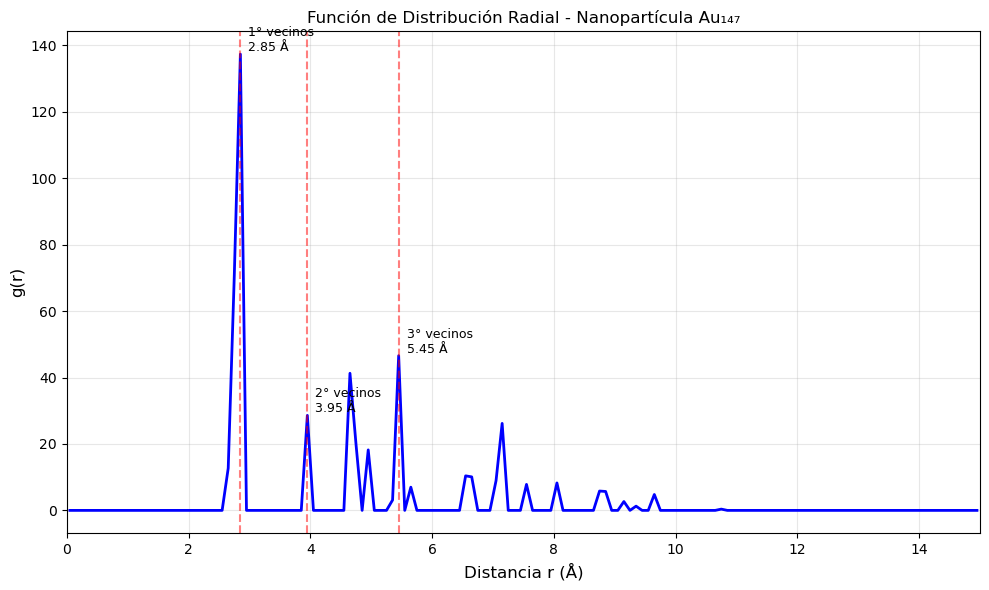


Picos encontrados (coordinación):
  Pico 1: r = 2.85 Å, g(r) = 137.36
  Pico 2: r = 3.95 Å, g(r) = 28.60
  Pico 3: r = 5.45 Å, g(r) = 46.58
  Pico 4: r = 7.15 Å, g(r) = 26.19
  Pico 5: r = 8.75 Å, g(r) = 5.83


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.cluster import Icosahedron
from ase.calculators.emt import EMT
from ase.optimize import BFGS

def calculate_rdf(atoms, rmax=10.0, nbins=100):
    """
    Calcula la función de distribución radial g(r)
    """
    positions = atoms.get_positions()
    n_atoms = len(atoms)
    
    # Calcular todas las distancias
    distances = []
    for i in range(n_atoms):
        for j in range(i+1, n_atoms):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < rmax:
                distances.append(dist)
    
    # Histograma
    hist, bin_edges = np.histogram(distances, bins=nbins, range=(0, rmax))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    dr = bin_edges[1] - bin_edges[0]
    
    # Normalizar por volumen de cáscara esférica
    # g(r) = [n(r) / (4πr²dr)] / densidad_promedio
    volumes = 4 * np.pi * bin_centers**2 * dr
    
    # Densidad promedio
    total_volume = (4/3) * np.pi * rmax**3
    avg_density = n_atoms / total_volume
    
    # RDF normalizada
    # Factor 2 porque contamos cada par una vez
    g_r = (2 * hist / volumes) / avg_density / n_atoms
    
    return bin_centers, g_r

# Crear y optimizar nanopartícula
atoms = Icosahedron('Au', noshells=3)  # 147 átomos
atoms.calc = EMT()
opt = BFGS(atoms, logfile=None)
opt.run(fmax=0.01)

# Calcular RDF
r, g_r = calculate_rdf(atoms, rmax=15.0, nbins=150)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(r, g_r, 'b-', linewidth=2)
plt.xlabel('Distancia r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.title('Función de Distribución Radial - Nanopartícula Au₁₄₇')
plt.grid(True, alpha=0.3)
plt.xlim(0, 15)

# Marcar picos (primeros vecinos, segundos vecinos, etc.)
from scipy.signal import find_peaks
peaks, _ = find_peaks(g_r, height=0.5, distance=10)

for i, peak_idx in enumerate(peaks[:3]):
    plt.axvline(x=r[peak_idx], color='r', linestyle='--', alpha=0.5)
    plt.text(r[peak_idx], g_r[peak_idx], f'  {i+1}° vecinos\n  {r[peak_idx]:.2f} Å',
             fontsize=9, va='bottom')

plt.tight_layout()
plt.savefig('rdf_Au_nanoparticula.png', dpi=300)
plt.show()

print("\nPicos encontrados (coordinación):")
for i, peak_idx in enumerate(peaks[:5]):
    print(f"  Pico {i+1}: r = {r[peak_idx]:.2f} Å, g(r) = {g_r[peak_idx]:.2f}")


## 9.4. Parte C: Ejercicios para Entregar

### 9.4.1. Tarea 1: Exploración de Materiales

Repite el análisis de la Parte A para:
1. Nanopartículas de plata (Ag)
2. Nanopartículas de cobre (Cu)
3. Nanopartículas de paladio (Pd)

Compara:
- Energía por átomo
- Radio de equilibrio
- Fracción de átomos superficiales

### 9.4.2. Tarea 2: Efectos de Temperatura

Modifica el código MD para simular las nanopartículas a diferentes temperaturas (100 K, 300 K, 500 K, 700 K) y analiza:
- Expansión térmica
- Fluctuaciones de energía
- Movilidad atómica

### 9.4.3. Tarea 3: Investigación

Lee el artículo:
> Baletto, F. & Ferrando, R. "Structural properties of nanoclusters: Energetic, thermodynamic, and kinetic effects." *Reviews of Modern Physics* 77, 371 (2005).

Responde:
1. ¿Qué estructuras son más estables para clusters metálicos de <100 átomos?
2. ¿Cómo afecta el "magic number" a la estabilidad?
3. ¿Qué es la transición icosaédrica-decaédrica?

---

## 9.5. 📚 Referencias y Recursos Adicionales

### 9.5.1. Libros
1. **Leach, A.** *Molecular Modelling: Principles and Applications* (2001) - Capítulos 3-5
2. **Frenkel & Smit** *Understanding Molecular Simulation* (2023) - Capítulos 1-4
3. **Martin, R.** *Electronic Structure* (2020) - Capítulos 1-7

### 9.5.2. Tutoriales Online
- ASE Documentation: https://wiki.fysik.dtu.dk/ase/
- Materials Project Workshop: https://workshop.materialsproject.org/
- nanoHUB courses: https://nanohub.org/courses

### 9.5.3. Artículos Clave
1. Hohenberg & Kohn (1964) - Fundamentos de DFT
2. Kohn & Sham (1965) - Ecuaciones de KS
3. Daw & Baskes (1984) - Potencial EAM

---

## 9.6. ✅ Checklist de Aprendizaje

Al completar esta unidad, deberías poder:

- [ ] Explicar las diferentes escalas en nanotecnología
- [ ] Describir la aproximación Born-Oppenheimer
- [ ] Construir modelos de nanopartículas con ASE
- [ ] Calcular propiedades geométricas de nanoestructuras
- [ ] Implementar optimización de geometría
- [ ] Calcular la función de distribución radial
- [ ] Comparar diferentes potenciales interatómicos
- [ ] Analizar efectos de tamaño en propiedades físicas

---

*Última actualización: Enero 2026*
